In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cv = 10
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## KNN

In [2]:
# 1. Load the dataset
data = pd.read_excel("/Users/alisoliman/Downloads/titanic3.xls") 
data.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
681,3,0,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,NaN,NaN,"Syria Kent, ON"
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC"
1226,3,0,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S,NaN,NaN,NaN
431,2,0,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S,NaN,NaN,"Denmark Hill, Surrey / Chicago"
1042,3,1,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,16,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
# 2. Preprocess the data
# Drop irrelevant columns
data = data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, errors='ignore')

In [6]:
# Fill missing values
data['age'] = data['age'].fillna(data['age'].median())
data['fare'] = data['fare'].fillna(data['fare'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

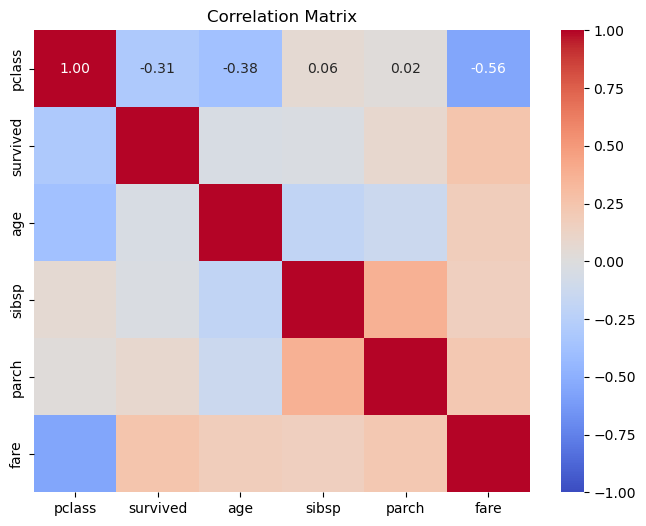

In [7]:
numeric_cols = data[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']]

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
#according to the correlation matrix we can see that:
    #surviving has a  medium positive correlation with fare and the number of parents
    #surviving has a weak positive correlation with age and the number of siblings on the ship
    #surviving has a medium negative correlation with class (the higher number in pcalss, the class gets worse ) 1 is the best class. 

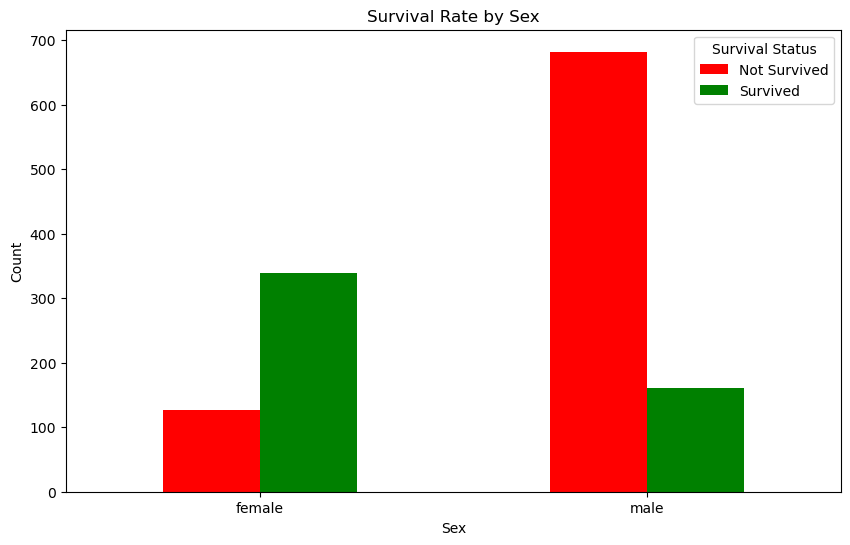

In [8]:
survival_counts = data.groupby(['sex', 'survived']).size().unstack(fill_value=0)

# Set colors: red for 'Not Survived' and green for 'Survived'
colors = ['red', 'green']

# Plot the count of survivors by sex
ax = survival_counts.plot(kind='bar', stacked=False, color=colors, figsize=(10, 6))

# Customize plot
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], title='Survival Status')

# Show the plot
plt.show()

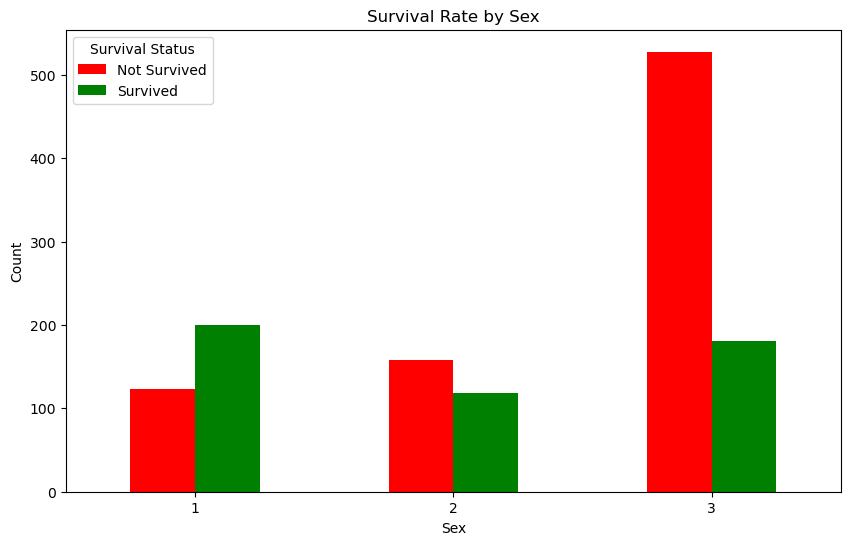

In [9]:
survival_counts = data.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Set colors: red for 'Not Survived' and green for 'Survived'
colors = ['red', 'green']

# Plot the count of survivors by sex
ax = survival_counts.plot(kind='bar', stacked=False, color=colors, figsize=(10, 6))

# Customize plot
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(['Not Survived', 'Survived'], title='Survival Status')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


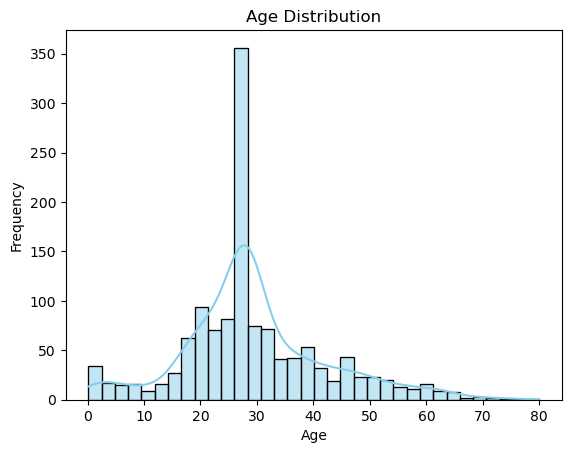

In [10]:
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()  # Show the third plot

/var/folders/n5/pwfhmryx4vnckctzc04g44sw0000gn/T/ipykernel_4242/445970584.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = data.groupby(['age_group', 'survived']).size().unstack(fill_value=0)


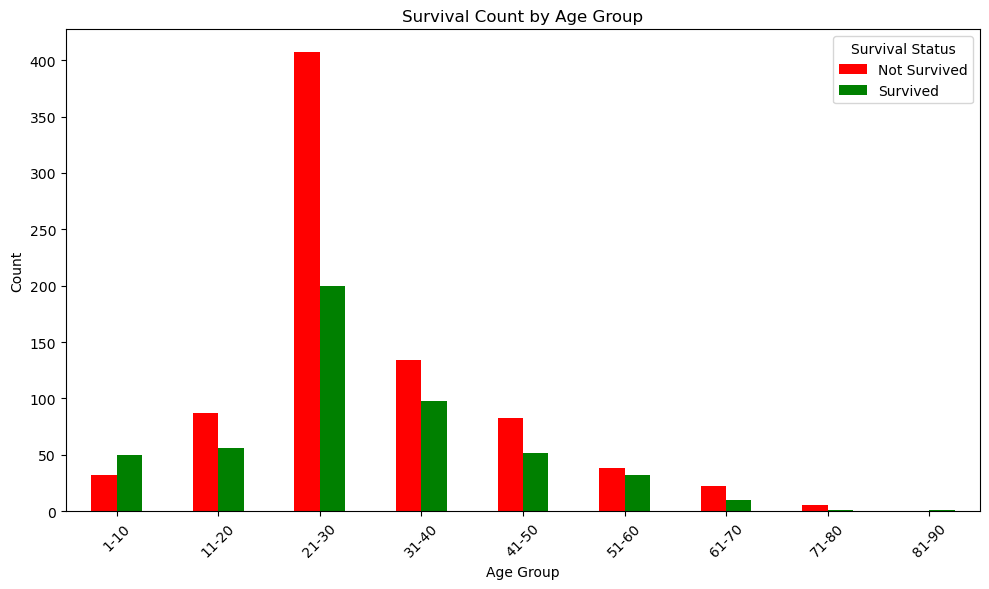

In [11]:
# Handle missing values in 'age' column by filling with the mean
data['age'] = data['age'].fillna(data['age'].median())

# Create age bins (1-10, 11-20, ..., 71-80, 81-90)
bins = range(0, 91, 10)
labels = [f'{i+1}-{i+10}' for i in bins[:-1]]

# Create a new column 'age_group' based on the bins
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and 'survived' to get the count
survival_counts = data.groupby(['age_group', 'survived']).size().unstack(fill_value=0)

# Set colors: red for 'Not Survived' and green for 'Survived'
colors = ['red', 'green']

# Plot the count of survivors by age group
ax = survival_counts.plot(kind='bar', stacked=False, color=colors, figsize=(10, 6))

# Customize plot
cv=50
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Not Survived', 'Survived'], title='Survival Status')

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [12]:
survival_counts

survived,0,1
age_group,,
1-10,32,50
11-20,87,56
21-30,407,200
31-40,134,98
41-50,83,52
51-60,38,32
61-70,22,10
71-80,6,1
81-90,0,1


In [13]:
survival_counts.columns = ['died', 'survived']
survival_counts['survival_percentage'] = (
    survival_counts['survived'] / (survival_counts['died'] + survival_counts['survived']) * 100
)
survival_counts

,died,survived,survival_percentage
age_group,,,
1-10,32,50,60.975610
11-20,87,56,39.160839
21-30,407,200,32.948929
31-40,134,98,42.241379
41-50,83,52,38.518519
51-60,38,32,45.714286
61-70,22,10,31.250000
71-80,6,1,14.285714
81-90,0,1,100.000000


In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])  # Male -> 1, Female -> 0
data['embarked'] = label_encoder.fit_transform(data['embarked'])
data = data.drop(['age_group'],axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [15]:
# Define features and target
features = data.drop(['survived'], axis=1)
y = data['survived']

In [16]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [17]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [18]:
k_values = range(1, 11)
metrics = {"k": [], "accuracy": [], "precision": [], "recall": [], "f1_score": []}

In [19]:
# applying knn on all Ks
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics["k"].append(k)
    metrics["accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)

In [20]:
performance_df = pd.DataFrame(metrics)
performance_df

,k,accuracy,precision,recall,f1_score
0,1,0.770992,0.666667,0.666667,0.666667
1,2,0.782443,0.753846,0.544444,0.632258
2,3,0.812977,0.741176,0.700000,0.720000
3,4,0.820611,0.811594,0.622222,0.704403
4,5,0.828244,0.777778,0.700000,0.736842
5,6,0.824427,0.805556,0.644444,0.716049
6,7,0.812977,0.766234,0.655556,0.706587
7,8,0.809160,0.822581,0.566667,0.671053
8,9,0.812977,0.797101,0.611111,0.691824
9,10,0.816794,0.828125,0.588889,0.688312


In [21]:
#Experiment with different distance metrics
distance_metrics = ["euclidean", "manhattan", "minkowski"]
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)  # Using k=3 as an example
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\nPerformance with {metric} distance:")
    print(classification_report(y_test, y_pred))


Performance with euclidean distance:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       172
           1       0.74      0.70      0.72        90

    accuracy                           0.81       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262


Performance with manhattan distance:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       172
           1       0.74      0.71      0.73        90

    accuracy                           0.82       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.82      0.82      0.82       262


Performance with minkowski distance:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       172
           1       0.74      0.70      0.72        90

    accuracy                           0.81       262
   macro avg  

In [22]:
#The features are normalized ,so Euclidean distance performs well.
#Manhattan distance may perform better than Euclidean distance, especially when the features are not strongly correlated.
#Minkowski Distance: Flexible but requires experimentation with p , when p = 2 (Euclidean) or  p = 1 (Manhattan) may suffice.

In [23]:
best_k = performance_df.loc[performance_df["f1_score"].idxmax(), "k"]
final_knn = KNeighborsClassifier(n_neighbors=int(best_k))
final_knn.fit(X_train, y_train)
final_y_pred = final_knn.predict(X_test)

In [24]:
print("\nFinal Model Performance:")
print(classification_report(y_test, final_y_pred))


Final Model Performance:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       172
           1       0.78      0.70      0.74        90

    accuracy                           0.83       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.83      0.83      0.83       262



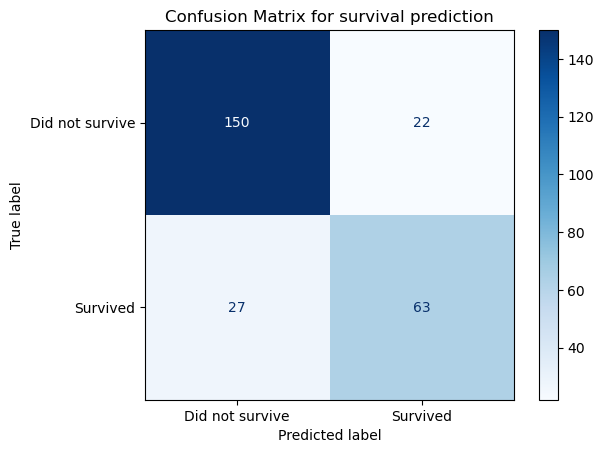

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Did not survive', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for survival prediction")
plt.show()

In [26]:
# Check a few predictions vs. actual values
y_test.head(), y_pred[:5]

(659    1
 338    0
 610    0
 950    0
 290    0
 Name: survived, dtype: int64,
 array([1, 0, 1, 0, 0]))

## Decision tree

In [27]:
tree = DecisionTreeClassifier(random_state=30)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [28]:
y_pred = tree.predict(X_test)

In [29]:
# Evaluate the performance
print("Initial Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Initial Model Performance:
Accuracy: 0.8015267175572519
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       172
           1       0.72      0.70      0.71        90

    accuracy                           0.80       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262



In [30]:
# Step 3: Experiment with Hyperparameters
# Define a grid of hyperparameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [31]:
# Perform a grid search with cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [32]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [33]:
# Step 4: Use the Best Model for Prediction
best_tree = grid_search.best_estimator_
y_pred_optimized = best_tree.predict(X_test)

In [34]:
# Evaluate the performance of the optimized model
print("Optimized Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

Optimized Model Performance:
Accuracy: 0.8320610687022901
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       172
           1       0.79      0.70      0.74        90

    accuracy                           0.83       262
   macro avg       0.82      0.80      0.81       262
weighted avg       0.83      0.83      0.83       262



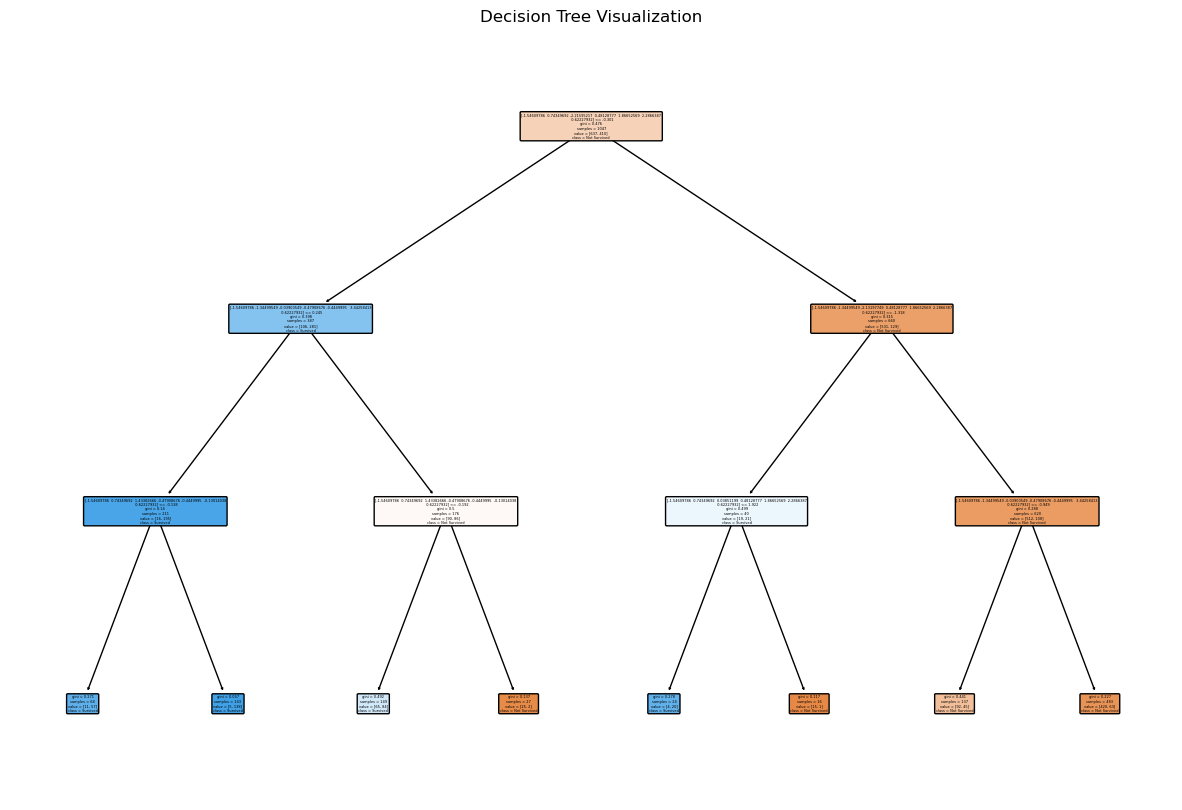

In [35]:
# Step 5: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(
    best_tree,
    feature_names=X,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

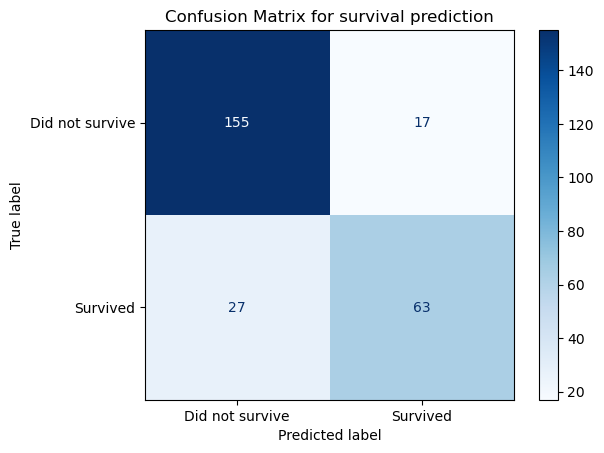

In [36]:
# Step 6: Analyze the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Did not survive', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for survival prediction")
plt.show()


## SVM


Kernel: linear
Accuracy: 0.7977099236641222
Confusion Matrix:
[[151  21]
 [ 32  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       172
           1       0.73      0.64      0.69        90

    accuracy                           0.80       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.79      0.80      0.79       262



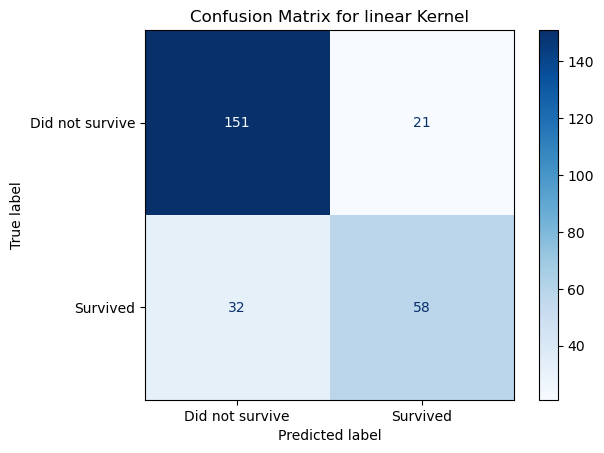

Kernel: poly
Accuracy: 0.8244274809160306
Confusion Matrix:
[[158  14]
 [ 32  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       172
           1       0.81      0.64      0.72        90

    accuracy                           0.82       262
   macro avg       0.82      0.78      0.79       262
weighted avg       0.82      0.82      0.82       262



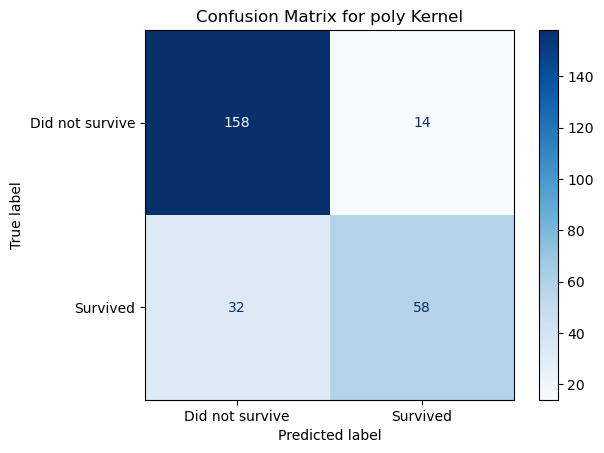

Kernel: rbf
Accuracy: 0.8091603053435115
Confusion Matrix:
[[153  19]
 [ 31  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       172
           1       0.76      0.66      0.70        90

    accuracy                           0.81       262
   macro avg       0.79      0.77      0.78       262
weighted avg       0.81      0.81      0.81       262



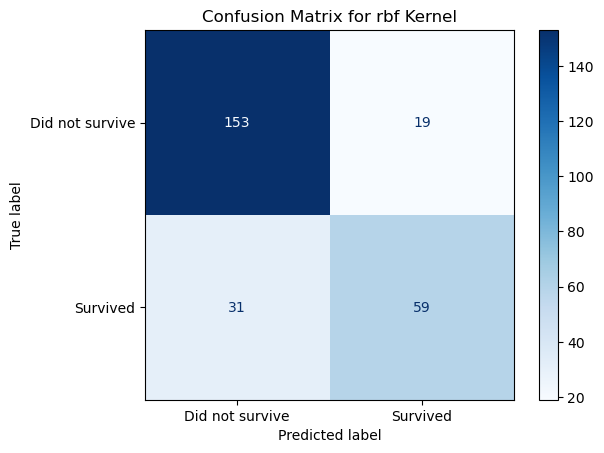

In [37]:
# Train and evaluate SVM model with different kernel functions and hyperparameters
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    try:
        svm_model = SVC(kernel=kernel, random_state=42)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        print(f"Kernel: {kernel}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix for {kernel} Kernel")
        plt.show()
    except Exception as e:
        print(f"An error occurred with kernel {kernel}: {e}")

In [38]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['poly']
}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly']},
             verbose=2)

In [39]:
# Print the best parameters and estimator
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Estimator: {grid_search.best_estimator_}")

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Best Estimator: SVC(C=10, gamma=0.1, kernel='poly')


In [43]:
# Evaluate the tuned model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred)}")
print("Tuned Model Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred))

Tuned Model Accuracy: 0.8129770992366412
Tuned Model Confusion Matrix:
[[153  19]
 [ 30  60]]
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       172
           1       0.76      0.67      0.71        90

    accuracy                           0.81       262
   macro avg       0.80      0.78      0.79       262
weighted avg       0.81      0.81      0.81       262



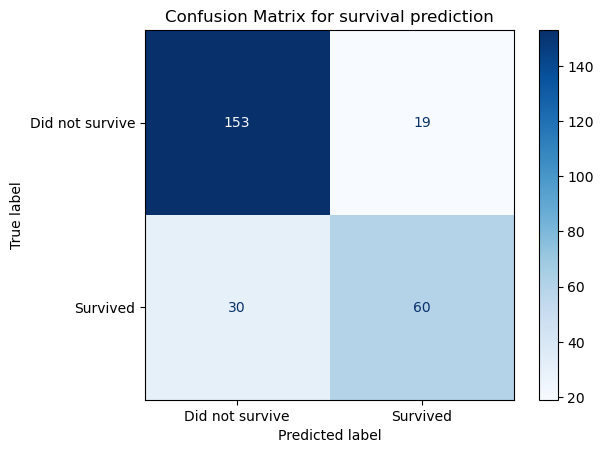

In [41]:
# Plot confusion matrix for the tuned model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for survival prediction")
plt.show()

## Naive Bayes

In [42]:
# Initialize the Naive Bayes Classifier
nb_model = GaussianNB()

#Train the model
nb_model.fit(X_train, y_train)

#  Predict on the test set
y_pred = nb_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7938931297709924

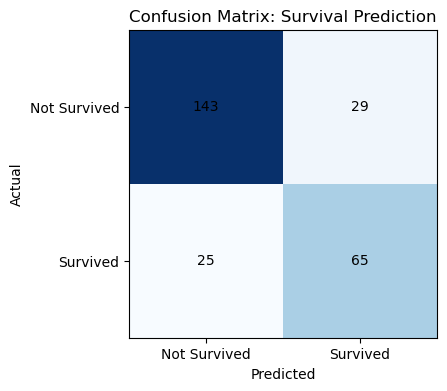

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Create a more descriptive figure title
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix: Survival Prediction")

# Set up the labels for the axes
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Create a heatmap of the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)

# Add text annotations to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center", color="black")

# Set the tick labels
tick_marks = np.arange(len(['Not Survived', 'Survived']))
plt.xticks(tick_marks, ['Not Survived', 'Survived'])
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

# Display the plot
plt.show()

In [45]:
##True Negative (143): The model correctly predicted that 143 people would not survive.
##False Positive (29): The model incorrectly predicted that 29 people would survive when they actually didn't.
##False Negative (25): The model incorrectly predicted that 25 people would not survive when they actually did.
##True Positive (65): The model correctly predicted that 65 people would survive.

## trying new data according to the dataset

In [46]:
data.sample(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
109,1,1,1,36.0,0,0,26.3875,2
1254,3,1,1,25.0,0,0,0.0000,2
1007,3,1,0,15.0,0,0,8.0292,1
634,3,0,1,26.0,0,0,7.8958,2
188,1,1,0,51.0,0,1,39.4000,2


In [47]:
new_values= [[3,1,25,1,0,50,1]]
new_values=scaler.fit_transform(new_values)
print(knn.predict(new_values))

[0]


In [48]:
print(best_tree.predict(new_values))

[0]


In [49]:
print(nb_model.predict(new_values))

[0]


In [50]:
print(grid_search.best_estimator_.predict(new_values))

[0]


## Applying cross-validation to ensure that the models perform well

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_tree, X, y, cv=cv)  # 10-fold cross-validation
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.8131908831908832


In [52]:
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=cv)  # 10-fold cross-validation
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.8071509971509971


## comparative analysis

In [53]:
#KNN: Performs well with normalized data and optimized k but struggles with large datasets due to computational cost and sensitivity to outliers.
#Naive Bayes: Fast and efficient with categorical data but underperforms due to the unrealistic assumption of feature independence in Titanic data.
#SVM: Provides high accuracy and handles non-linear relationships effectively using kernels but is computationally intensive and requires careful tuning.
#Decision Tree: Highly interpretable and captures non-linear patterns but prone to overfitting without pruning, limiting its generalization.
#SVM or Decision Tree would be ideal for the Titanic dataset, depending on your computational constraints and need for interpretability.